In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
df = pd.read_csv("DecisionTree.csv")

In [3]:
df.head()

,番号,都道府県番号 市区町村 商業集積地（商店街）名,都道府県名,区番号,区名,区毎番号,名称,集積 細分,Lat,Lng,...,小型店売場面積,小型店売場効率,小型店従業員効率,延べ店舗数2,大型店事業所数,大型店従業者数,大型店年間商品販売額,大型店売場面積,大型店売場効率,大型店従業員効率
0,1,23,愛知県,101,名古屋市千種区,1,仲田本通商店街,13,35.170370,136.942300,...,804,1,10,0,0,0,0,0,0,0
1,2,23,愛知県,101,名古屋市千種区,2,池下本通商店街,13,35.168803,136.945548,...,85,1,4,0,0,0,0,0,0,0
2,3,23,愛知県,101,名古屋市千種区,3,仲田銀座商店街,13,35.168264,136.941545,...,489,1,14,0,0,0,0,0,0,0
3,4,23,愛知県,101,名古屋市千種区,4,今池東南商店街,12,35.166129,136.936784,...,2012,1,23,1,5,214,2952,6662,0,14
4,5,23,愛知県,101,名古屋市千種区,5,覚王山商店街,13,35.166503,136.952527,...,2072,1,9,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['番号', '都道府県番号\n市区町村\n商業集積地（商店街）名', '都道府県名', '区番号', '区名', '区毎番号', '名称',
       '集積\n細分', 'Lat', 'Lng', '事業所数', '従業者数', '年間商品販売額', '売場面積', '売場効率',
       '従業員効率', '理論売上との残差', '理論売上', '小型店事業所数', '小型店従業者数', '小型店年間商品販売額',
       '小型店売場面積', '小型店売場効率', '小型店従業員効率', '延べ店舗数2', '大型店事業所数', '大型店従業者数',
       '大型店年間商品販売額', '大型店売場面積', '大型店売場効率', '大型店従業員効率'],
      dtype='object')

In [5]:
dfData = df[['事業所数', '従業者数', '年間商品販売額', '売場面積',
       '従業員効率', '理論売上との残差', '理論売上', '小型店事業所数', '小型店従業者数', '小型店年間商品販売額',
       '小型店売場面積', '小型店売場効率', '小型店従業員効率', '延べ店舗数2', '大型店事業所数', '大型店従業者数',
       '大型店年間商品販売額', '大型店売場面積', '大型店売場効率', '大型店従業員効率']]

In [6]:
dfTarget = df[['売場効率']]

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(dfData, dfTarget)

In [8]:
predicted = clf.predict(dfData)
predicted

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 1, 2, 4, 2, 0, 4, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       0, 4, 0, 1, 1, 1, 1, 2, 4, 2, 1, 4, 2, 2, 4, 1, 1, 4, 1, 2, 1, 2,
       4, 1, 4, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 4, 1, 4, 4, 1, 2, 1, 4, 1, 0, 0, 0, 4, 1, 2, 0, 1,
       1, 1, 0, 0, 2, 4, 1, 1, 2, 0, 4, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 2, 4, 1, 2, 0, 4, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 4, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 4, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 4, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1])

In [9]:
sum(predicted == dfTarget) / len(dfTarget)

/Users/Yoshimasa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


ValueError: Wrong number of items passed 193, placement implies 1

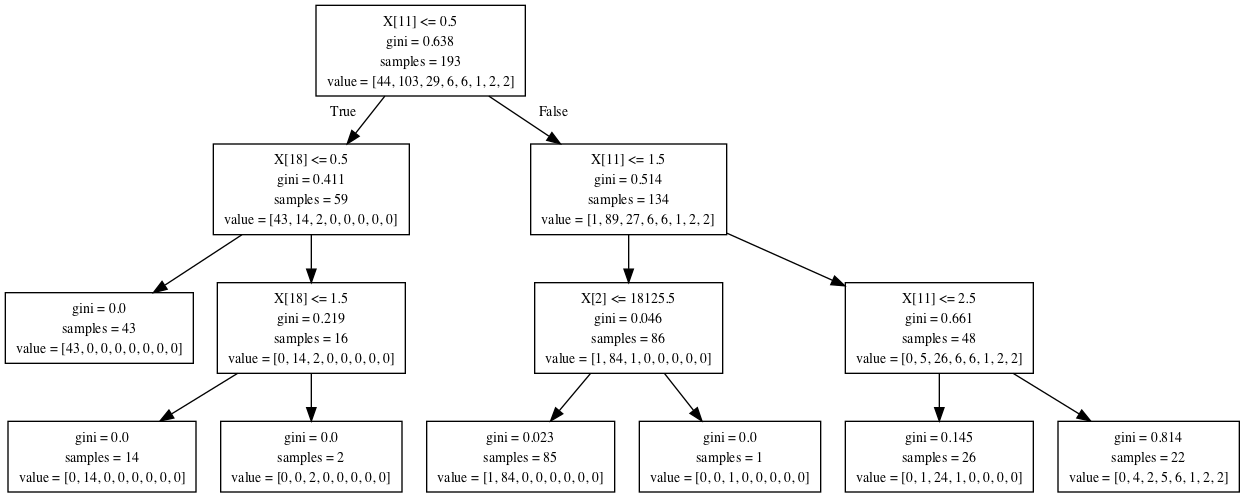

In [18]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# ノートブックに可視化
from IPython.display import Image
Image(graph.create_png())